## Car Advertising 

In this notebook, I will be examining a dataset about car advertisments. I will take a look at the dataframe and see what insights we can gain.

In [117]:
#Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [118]:
#reading the Dataframe
df_vehicles = pd.read_csv("/Users/andecedeno/sprint4project2-1/vehicles_us.csv")

In [119]:
# Getting information on the dataset
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [120]:
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [121]:
df_vehicles.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


Upon first glance, we have a dataframe with some great information. We can  peform analysis with what we have, but I think adding a 'Manufacturer' column will help our analyis.

In [122]:
#Obtaining a list of the unique names in the 'model' column.
df_vehicles['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [123]:
#creating a function to make a new column for manufacturer
def extract_manufacturer(model_name):
    # Splitting by space and assuming the first word is the manufacturer
    return model_name.split()[0].lower()  # Assuming all manufacturer names are lowercase

# Apply the function to create the 'manufacturer' column
df_vehicles['manufacturer'] = df_vehicles['model'].apply(extract_manufacturer)

In [124]:
#Printing the dataframe to ensure our new column was created
df_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler


Our function was a success and we have added a 'manufacturer' column. This will help our analysis and help us understand the differences between manufacturers when it comes to advertising. 

In [125]:
#Checking the datafrme for null values
df_vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
manufacturer        0
dtype: int64

It looks like there are null values in our dataframe. In order to perform proper analysis, I will get rid of all null values.

In [126]:
#Dropping null values in the dataframe
df_vehicles.dropna(inplace=True)

Now that the null values have been dropped. We can begin to create some graphs and analyze our dataset.

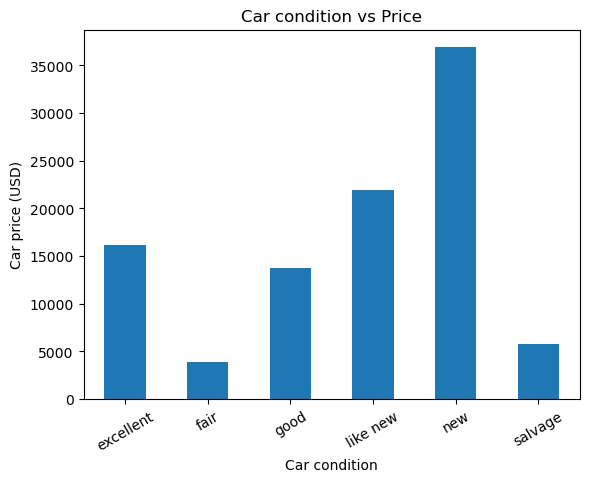

In [127]:
df_vehicles['price'] = df_vehicles['price'].round()
con_vs_price_df = df_vehicles.groupby('condition')['price'].mean().reset_index()
con_vs_price_df.plot(kind='bar', x='condition',y='price',title='Car condition vs Price',xlabel='Car condition',ylabel='Car price (USD)',rot=30,legend=False)
plt.show()

I created a simple bar chart to better understand the relationship between, car condition and price. Not suprisingly we see that new cars are priced higher than any other category. However, it is intresting that fair and salvage condition cars are close in price. This could be for many reasons but some salvage cars, could be in that state because of a crash. Which means the car parts would still be valuable. Fair condition cars may operate but the car parts might be older and a bit more worn. 

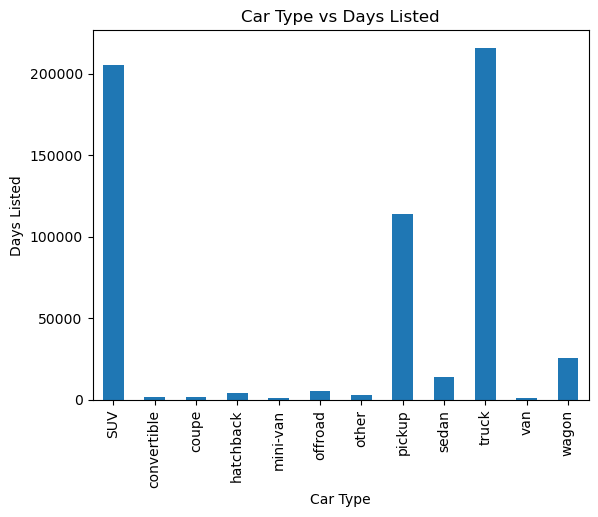

In [128]:

type_dlisted_df = df_vehicles.groupby('type')['days_listed'].sum().reset_index()
type_dlisted_df.plot(kind='bar',x='type',y='days_listed',title='Car Type vs Days Listed',xlabel='Car Type',ylabel='Days Listed',legend=False)
plt.show()

I created another bar chart to better understand the relationship between car type and days listed. When it comes to the type of car being listed more often, SUV's and trucks are popular. Convertible and coupes are less popular. It seems like practicality is a big factor in advertising. This could mean more SUV'S and trucks are available because more people buy those car types. 

In [129]:
model_days_listed_df = df_vehicles.groupby('model')['days_listed'].mean().reset_index()
fig = px.histogram (model_days_listed_df,x='days_listed',color='model', title='Average Days listed Per Model',)
fig.show()

In ths histogram above, I examine the relationship beetween car model and days listed. Most car models are listed for about 40 days. In just a little over a month, a majority of car models are being sold. Cars listed for 60 days or longer could be for many reasons including condition and practicality.

In [130]:
model_price_df = df_vehicles.groupby('model')['price'].mean().reset_index()
fig = px.histogram (model_price_df,x='price',color='model', title='Average Price Per Model',)
fig.show()

This histogram take a look at the relationship between car model and price. Just under 10K and 20K seems to be the price range most cars are listed for. A few models are priced under 30k, which could mean they are either new or in a like new condition. 

In [131]:
manu_price_df = df_vehicles.groupby('manufacturer')['price'].mean().reset_index()
fig = px.histogram(manu_price_df,x='price',color='manufacturer',title='Average price by Manufacturer')
fig.show()

This histogram takes a look ath the avaerage price of cars listed per manufacturer. A majority of manufacturers have cars priced just below 10k and 15K. The amount of advertisments made by manufacturers are in that price range. This price point can tell us that alot of the cars listed may be used.

In [132]:
manu_years_df = df_vehicles.groupby('manufacturer')['model_year'].mean().reset_index()
fig = px.scatter(manu_years_df,x='manufacturer',color='model_year',title='Average Model Year by manufacturer')
fig.show()

This scatterpolot was created to see the average model year by manufacturer. Manufacturers on average have listed cars beween 2008 and 2014. This helps us see that a majority of the advertisements are for used cars.

In [133]:
#Creating a new df for manufacturers and amount of ads
manu_adv = df_vehicles.groupby('manufacturer')['date_posted'].count().reset_index()
manu_adv

,manufacturer,date_posted
0,acura,9
1,bmw,136
2,buick,82
3,cadillac,138
4,chevrolet,3327
5,chrysler,36
6,dodge,142
7,ford,3869
8,gmc,1027
9,honda,485


In [135]:
fig = px.histogram(manu_adv,x='date_posted',color='manufacturer',title='Ads posted by manufacturer')
fig.show()

In [138]:
manu_model = df_vehicles.groupby(['manufacturer','model'])['date_posted'].count().reset_index()
manu_model.head()

,manufacturer,model,date_posted
0,acura,acura tl,9
1,bmw,bmw x5,136
2,buick,buick enclave,82
3,cadillac,cadillac escalade,138
4,chevrolet,chevrolet camaro,33


This final chart shows the amount of advertisments created by manufacturer. It looks like ford and chevrolet created the most amount of adverising for their vehicles. While acura created the least. It might be beneficial to offer advertsing discounts to more frequent clients like ford and chevrolet.

After taking a look at our dataframe and doing some analysis , i've come to the following conclusions:
* A majority of car advertisments are for used cars.
*  On average advertising listings last for a month.
*  Suv's and trucks are the most popular car types.
*  Ford and Chevorolet create the most advertisments  

The used car market is a big one and creating an easy way for manufacturers to advertise their used vehicles is important. Most people look for practical vehicles at a good price, so providing a way where consumers, manufacturers and advertisers to intersect would not only be beneficial but presents a big upside for all parties invlved.